In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
train_data = pd.read_csv(r'C:\Sachin new\Simplilearn\Capstone Project\Real Estate Project\train.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [4]:
train_data.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


### Checking and removing duplicate values

In [5]:
train_data['UID'].duplicated().sum()

160

In [6]:
train_data.drop_duplicates(inplace = True)

In [7]:
train_data.shape

(27161, 80)

In [8]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',None)

### Checking UID has all unique values. If yes, then setting UID as Index

In [9]:
train_data['UID'].nunique()

27161

In [10]:
train_data.set_index('UID',inplace = True)

In [11]:
train_data.isna().sum()

BLOCKID                        27161
SUMLEVEL                           0
COUNTYID                           0
STATEID                            0
state                              0
state_ab                           0
city                               0
place                              0
type                               0
primary                            0
zip_code                           0
area_code                          0
lat                                0
lng                                0
ALand                              0
AWater                             0
pop                                0
male_pop                           0
female_pop                         0
rent_mean                        242
rent_median                      242
rent_stdev                       242
rent_sample_weight               242
rent_samples                     242
rent_gt_10                       242
rent_gt_15                       242
rent_gt_20                       242
r

In [12]:
pd.DataFrame({'Missing Count': train_data.isna().sum(), 'Missing Percent': (train_data.isna().mean().round(4)*100)})

,Missing Count,Missing Percent
BLOCKID,27161,100.00
SUMLEVEL,0,0.00
COUNTYID,0,0.00
STATEID,0,0.00
state,0,0.00
state_ab,0,0.00
city,0,0.00
place,0,0.00
type,0,0.00
primary,0,0.00


### Remove BlockID since it is completely blank

In [13]:
train_data.drop(['BLOCKID'], axis = 1, inplace = True)

In [14]:
train_data.head()

,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.0542

### Remove 'Primary' column and 'Sumlevel' column, since they have the same values

In [15]:
train_data.drop(train_data[['primary','SUMLEVEL']], axis = 1, inplace=True)

### Checking how many rows have population = Zero. What are the other data in those rows

In [16]:
(train_data['pop']==0).value_counts()

False    27019
True       142
Name: pop, dtype: int64

In [17]:
train_data[train_data['pop']==0]

,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267158,47,36,New York,NY,Brooklyn,New York City,City,11215,718,40.659126,-73.969773,2313042.0,227326,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290217,670,51,Virginia,VA,Hopewell,Hopewell City,Town,23860,804,37.289420,-77.269743,5940771.0,10627,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247072,91,20,Kansas,KS,Shawnee Mission,Lenexa City,City,66219,913,38.937953,-94.768942,13379076.0,148768,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253670,65,26,Michigan,MI,Lansing,Edgemont Park,CDP,48915,517,42.739759,-84.580693,3105697.0,289337,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262696,15,33,New Hampshire,NH,Manchester,Manchester City,CDP,3103,603,42.924101,-71.435913,3827015.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268317,61,36,New York,NY,New York,New York City,City,10004,212,40.690055,-74.046142,78638.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250649,17,25,Massachusetts,MA,Maynard,Maynard,City,1754,978,42.409915,-71.481881,3842441.0,16212,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230726,81,6,California,CA,Burlingame,Millbrae City,City,94019,650,37.614777,-122.376913,7920265.0,3591281,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### Since all rows, where population is zero, the other columns are also blank. Hence deleting those rows

In [18]:
train_data = train_data.drop(train_data[train_data['pop']==0].index)

In [19]:
pd.DataFrame({'Missing Count': train_data.isna().sum(), 'Missing Percent': (train_data.isna().mean().round(4)*100)})

,Missing Count,Missing Percent
COUNTYID,0,0.00
STATEID,0,0.00
state,0,0.00
state_ab,0,0.00
city,0,0.00
place,0,0.00
type,0,0.00
zip_code,0,0.00
area_code,0,0.00
lat,0,0.00


### Checking how many rows have no family income details. What are the other key data in those rows

In [20]:
train_data[train_data['hi_mean'].isna()]

,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
223593,19,4,Arizona,AZ,Tucson,Littletown,CDP,85734,520,32.067721,-110.867177,2909152.0,0,4531,4370,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64962,0.63734,0.91925,36.73330,34.50000,12.85240,1145.08910,4370.0,40.02370,40.83333,8.49563,30.01695,161.0,NaN,0.16308,0.16308,0.02634,0.20499
246589,157,18,Indiana,IN,West Lafayette,West Lafayette City,City,47906,765,40.427960,-86.925357,771959.0,0,5712,3417,2295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,19.55099,19.25000,1.59068,2037.51947,3417.0,19.46248,19.16667,1.53053,1345.70033,2295.0,NaN,0.00000,0.00000,0.00000,0.00000
286305,245,48,Texas,TX,Port Arthur,Central Gardens,Town,77641,409,29.985982,-94.050079,3500203.0,130615,2202,2194,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.57482,0.57482,NaN,39.79742,41.08333,12.65128,505.61251,2194.0,16.00833,16.08333,1.19617,2.51429,8.0,NaN,0.24825,0.24825,0.05283,0.16690
239655,121,13,Georgia,GA,Atlanta,Gresham Park,City,30315,404,33.710292,-84.367788,660642.0,0,2382,2367,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78553,0.78413,1.00000,42.24339,40.25000,11.33838,488.27662,2367.0,42.45833,42.41667,1.82574,2.79661,15.0,NaN,0.24546,0.24546,0.07140,0.21335
262260,109,31,Nebraska,NE,Lincoln,Yankee Hill,Village,68512,402,40.770017,-96.703843,194262.0,0,1273,1273,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81610,0.81610,NaN,38.99314,36.91667,13.68787,301.07226,1273.0,NaN,NaN,NaN,NaN,NaN,NaN,0.18539,0.18539,0.02514,0.28358
279189,37,72,Puerto Rico,PR,Ceiba,Ceiba,Urban,735,787,18.238828,-65.626836,31232980.0,16925264,3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,26.83716,24.83333,4.18960,0.81501,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.00000
252510,510,24,Maryland,MD,Baltimore,Baltimore City,CDP,21202,410,39.299511,-76.609125,156309.0,0,4832,4592,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60883,0.60614,0.65909,34.17746,31.58333,11.91385,1383.61537,4592.0,33.08390,33.08333,10.31093,75.03695,240.0,NaN,0.12979,0.12979,0.03506,0.11433
231894,111,6,California,CA,Avalon,Channel Islands Beach,City,90704,310,33.255655,-119.503588,

In [21]:
train_data[train_data['hi_mean'].isna()].shape

(65, 76)

### Since these rows also have missing information for other key features such as Rent, Mortgage cost, home owner cost, loan/debt details, hence these are also deleted

In [22]:
train_data = train_data.drop(train_data[train_data['hi_mean'].isna()].index)

In [23]:
pd.DataFrame({'Missing Count': train_data.isna().sum(), 'Missing Percent': (train_data.isna().mean().round(4)*100)})

,Missing Count,Missing Percent
COUNTYID,0,0.00
STATEID,0,0.00
state,0,0.00
state_ab,0,0.00
city,0,0.00
place,0,0.00
type,0,0.00
zip_code,0,0.00
area_code,0,0.00
lat,0,0.00


In [24]:
train_data.shape

(26954, 76)

### There are still missing cases w.r.t. rental information, household income, family income, monthly mortgage and owners cost. Since these are related to the geographic location, the missing values are filled with average values for the respective "state"

In [25]:
train_data.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_

In [26]:
rent_na = ['rent_mean', 'rent_median','rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10','rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50']
family_na = ['family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples']
hc_mortgage_na = ['hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples']
hc_na = ['hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight']

In [27]:
train_data[rent_na] = train_data.groupby('state')[rent_na].transform(lambda x: x.fillna(x.mean()))
train_data[family_na] = train_data.groupby('state')[family_na].transform(lambda x: x.fillna(x.mean()))
train_data[hc_mortgage_na] = train_data.groupby('state')[hc_mortgage_na].transform(lambda x: x.fillna(x.mean()))
train_data[hc_na] = train_data.groupby('state')[hc_na].transform(lambda x: x.fillna(x.mean()))

In [28]:
pd.DataFrame({'Missing Count': train_data.isna().sum(), 'Missing Percent': (train_data.isna().mean().round(4)*100)})

,Missing Count,Missing Percent
COUNTYID,0,0.00
STATEID,0,0.00
state,0,0.00
state_ab,0,0.00
city,0,0.00
place,0,0.00
type,0,0.00
zip_code,0,0.00
area_code,0,0.00
lat,0,0.00


In [29]:
train_data.shape

(26954, 76)

### The remaining missing values are filled with the average of the respective columns

In [30]:
train_data.fillna(train_data.mean(numeric_only = True), inplace = True)

In [31]:
pd.DataFrame({'Missing Count': train_data.isna().sum(), 'Missing Percent': (train_data.isna().mean().round(4)*100)})

,Missing Count,Missing Percent
COUNTYID,0,0.0
STATEID,0,0.0
state,0,0.0
state_ab,0,0.0
city,0,0.0
place,0,0.0
type,0,0.0
zip_code,0,0.0
area_code,0,0.0
lat,0,0.0


In [32]:
#train_data.to_csv('C:\\Sachin new\\Simplilearn\\Capstone Project\\Real Estate Project\\train_updated_25Jan.csv')

In [33]:
train_data.shape

(26954, 76)

In [34]:
train_data.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_

### Selecting important features for doing correlation analysis

In [35]:
train_correl = train_data[['COUNTYID', 'STATEID','pop','rent_mean','hi_mean','family_mean','hc_mortgage_mean', 
                          'hc_mean','home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
                          'male_age_mean','female_age_mean','pct_own', 'married', 'separated', 'divorced']]

In [36]:
train_correl.shape

(26954, 18)

In [37]:
# train_correl.to_csv('C:\\Sachin new\\Simplilearn\\Capstone Project\\Real Estate Project\\train_correl.csv')

In [38]:
train_correl.corr()

,COUNTYID,STATEID,pop,rent_mean,hi_mean,family_mean,hc_mortgage_mean,hc_mean,home_equity_second_mortgage,second_mortgage,home_equity,debt,male_age_mean,female_age_mean,pct_own,married,separated,divorced
COUNTYID,1.000000,0.224565,-0.000567,-0.100521,-0.079543,-0.076742,-0.141659,-0.092458,-0.030399,-0.040276,-0.126109,-0.087372,-0.065357,-0.058310,-0.004983,-0.021784,0.068649,0.050734
STATEID,0.224565,1.000000,-0.032491,-0.217702,-0.086304,-0.072161,-0.169282,-0.014386,-0.101082,-0.114382,-0.146774,-0.163281,-0.024776,-0.018402,0.070931,0.026900,0.029564,0.019299
pop,-0.000567,-0.032491,1.000000,0.163491,0.174299,0.134765,0.115557,0.056816,0.085189,0.085077,0.105959,0.248503,-0.195106,-0.200166,0.095063,0.167639,-0.082938,-0.166136
rent_mean,-0.100521,-0.217702,0.163491,1.000000,0.755850,0.702992,0.753801,0.596587,0.129229,0.153189,0.413234,0.438072,0.043815,0.003500,0.140578,0.258521,-0.189583,-0.379534
hi_mean,-0.079543,-0.086304,0.174299,0.755850,1.000000,0.961763,0.765860,0.675850,0.082510,0.101047,0.476613,0.422640,0.204455,0.132075,0.481080,0.538640,-0.320419,-0.398079
family_mean,-0.076742,-0.072161,0.134765,0.702992,0.961763,1.000000,0.761065,0.688063,0.058287,0.077058,0.465788,0.381350,0.262425,0.197964,0.451157,0.488259,-0.327091,-0.361172
hc_mortgage_mean,-0.141659,-0.169282,0.115557,0.753801,0.765860,0.761065,1.000000,0.796802,0.114534,0.148739,0.469283,0.392535,0.096336,0.051024,0.065044,0.228236,-0.179829,-0.409739
hc_mean,-0.092458,-0.014386,0.056816,0.596587,0.675850,0.688063,0.796802,1.000000,0.033088,0.054997,0.361045,0.300787,0.124545,0.091350,0.097519,0.201218,-0.168544,-0.342244
home_equity_second_mortgage,-0.030399,-0.101082,0.085189,0.129229,0.082510,0.058287,0.114534,0.033088,1.000000,0.931887,0.516285,0.334901,-0.138892,-0.137610,-0.053974,-0.009698,-0.008697,-0.042450
second_mortgage,-0.040276,-0.114382,0.085077,0.153189,0.101047,0.077058,0.148739,0.054997,0.931887,1.000000,0.507355,0.355311,-0.135702,-0.136007,-0.055017,-0.011322,-0.010952,-0.059273


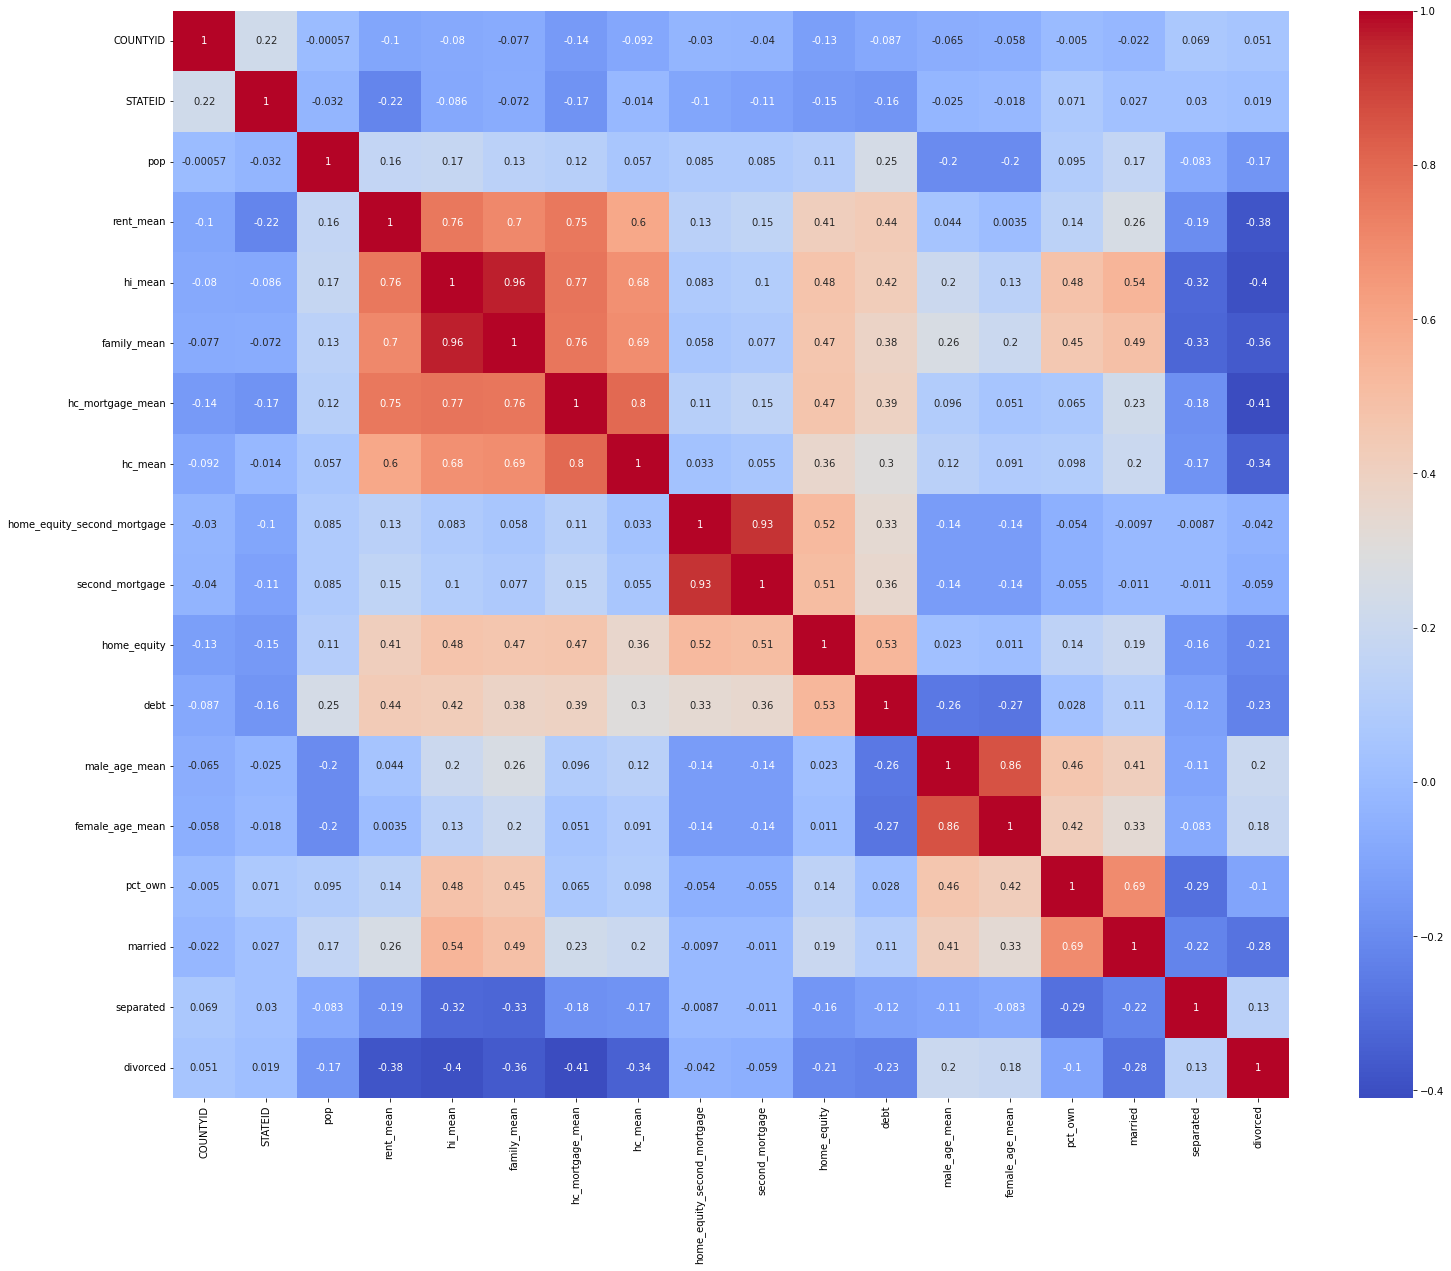

In [39]:
plt.figure(figsize=(25,20))
sns.heatmap(train_correl.corr(),annot=True,cmap='coolwarm')
plt.show()

### Computing "Bad Debt" column

In [40]:
train_data['Bad_Debt'] = train_data['second_mortgage'] + train_data['home_equity'] - train_data['home_equity_second_mortgage']

### define category columns

In [41]:
category_columns = ['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type', 'zip_code', 'area_code']

### define unwanted columns

In [42]:
unwanted_columns = ['lat', 'lng','ALand','AWater']

### Remove category and unwanted columns

In [43]:
fa_train_data = train_data.drop(category_columns, axis=1)
fa_train_data = fa_train_data.drop(unwanted_columns, axis=1)

In [44]:
fa_train_data

,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,Bad_Debt
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267822,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408
246444,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274
245683,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512
279653,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086
247218,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.74967,1.00000,1.00000,1.00000,26.07533,22.41667,11.84399,1296.89877,2586.0,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279212,1847,909,938,439.42839,419.0,140.29970,170.00000,170.0,1.00000,1.00000,1.00000,0.83333,0.79012,0.79012,0.7

In [45]:
fa_train_data.corr()

,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,Bad_Debt
pop,1.000000,0.982546,0.983029,0.163491,0.157255,0.118588,0.247947,0.407705,0.064774,0.060412,0.021028,-0.002041,-0.014094,-0.022559,-0.030028,-0.046293,0.423674,0.413499,0.174299,0.180786,0.131716,0.712059,0.899576,0.134765,0.130585,0.112231,0.786870,0.932933,0.115557,0.111318,0.085424,0.646117,0.775982,0.056816,0.055508,0.055423,0.460030,0.388110,0.085189,0.085077,0.105959,0.248503,-0.153255,-0.132398,-0.254815,0.046917,0.055718,0.037123,-0.195106,-0.157367,-0.040834,0.917564,0.982227,-0.200166,-0.166636,-0.038493,0.925712,0.982833,0.095063,0.167639,-0.034160,-0.082938,-0.166136,0.106023
male_pop,0.982546,1.000000,0.931747,0.160866,0.155413,0.109425,0.225631,0.385110,0.051229,0.045213,0.006773,-0.015432,-0.026944,-0.033761,-0.040805,-0.056349,0.400898,0.390557,0.176470,0.183688,0.128995,0.676161,0.861267,0.134387,0.130167,0.109186,0.760292,0.902190,0.113345,0.109194,0.084404,0.622569,0.750081,0.047831,0.046097,0.052040,0.443139,0.376694,0.081921,0.081554,0.101359,0.237351,-0.147392,-0.124193,-0.244452,0.031908,0.039181,0.029685,-0.208192,-0.167835,-0.082516,0.944742,0.999702,-0.203842,-0.164599,-0.067619,0.876698,0.931673,0.093931,0.140539,-0.005206,-0.077443,-0.153991,0.101314
female_pop,0.983029,0.931747,1.000000,0.160492,0.153696,0.123571,0.261480,0.416051,0.075918,0.073335,0.034367,0.011234,-0.000940,-0.010741,-0.018374,-0.034793,0.431653,0.421990,0.166200,0.171743,0.129898,0.723120,0.906606,0.130532,0.126534,0.111397,0.786184,0.931361,0.113788,0.109607,0.083511,0.647254,0.775001,0.063734,0.062892,0.056865,0.460963,0.386101,0.085500,0.085644,0.106873,0.251006,-0.153799,-0.135965,-0.256324,0.060115,0.070121,0.043190,-0.175532,-0.141664,0.001669,0.859397,0.931418,-0.189698,-0.162949,-0.008454,0.942404,0.999689,0.092931,0.188634,-0.061546,-0.085522,-0.172435,0.107042
rent_mean,0.163491,0.160866,0.160492,1.000000,0.976533,0.655728,-0.390880,-0.016583,0.101420,0.113683,0.054679,0.011222,-0.003690,0.002139,-0.002766,-0.004439,-0.038977,-0.011555,0.755850,0.752719,0.646592,-0.277390,0.105894,0.702992,0.699953,0.566350,-0.218621,0.165194,0.753801,0.752775,0.568042,-0.151363,0.290865,0.596587,0.578904,0.449156,-0.144777,-0.299954,0.129229,0.153189,0.413234,0.438072,-0.185748,-0.428718,-0.459564,0.364746,0.373519,0.330269,0.043815,0.093181,-0.116530,0.133127,0.160751,0.003500,0.045057,-0.180747,0.129438,0.160537,0.140578,0.258521,-0.109462,-0.189583,-0.379534,0.416831
rent_median,0.157255,0.155413,0.153696,0.976533,1.000000,0.569753,-0.385541,-0.021226,0.099590,0.114534,0.057573,0.013398,-0.002387,0.002529,-0.003106,-0.006792,-0.042594,-0.016328,0.719598,0.722732,0.600435,-0.270732,0.094173,0.660208,0.660504,0.521023,-0.201386,0.159147,0.715579,0.716390,0.528982,-0.142126,0.277407,0.563763,0.548866,0.417672,-0.147252,-0.290918,0.129117,0.151883,0.391111,0.425478,-0.180282,-0.405314,-0.446482,0.334504,0.343103,0.302126,0.024789,0.075080,-0.119319,0.126641,0.155334,-0.014405,0.028790,-0.183773,0.121430,0.153764,0.132140,0.245020,-0.097351,-0.175533,-0.363223,0.394833
rent_stdev,0.118588,0.109425,0.123571,0.655728,0.569753,1.000000,-0.180248,0.066453,-0.014252,0.040250,0.04

### Performing Kaiser-Meyer-Olkin (KMO) Test to measure the suitability of data for factor analysis

In [46]:
from factor_analyzer import FactorAnalyzer

In [47]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [48]:
kmo_all,kmo_model=calculate_kmo(fa_train_data)

C:\Users\14sac\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [49]:
kmo_model

0.8690059170820098

In [50]:
fa = FactorAnalyzer(rotation=None, n_factors = 25)
fa.fit(fa_train_data)

FactorAnalyzer(n_factors=25, rotation=None, rotation_kwargs={})

In [51]:
ev, v = fa.get_eigenvalues()
sorted(ev,reverse=True)

[15.480602432103586,
 12.035298223423114,
 8.165675040227022,
 4.560327457433876,
 3.938267006278989,
 3.0385535659292953,
 2.1328597186434965,
 1.4376210328626557,
 1.314363398590606,
 1.1417681229735344,
 0.9759649736686924,
 0.939478391319101,
 0.8316062246346417,
 0.7524797022206464,
 0.6558022438811698,
 0.5706593917411812,
 0.5274510677941903,
 0.4835517718964641,
 0.4569310116319864,
 0.3917697613974229,
 0.3651669458039393,
 0.31995971111724025,
 0.3136128003737653,
 0.3044376689561306,
 0.2588531647522717,
 0.24364519533519738,
 0.2282959535626511,
 0.20273674543147266,
 0.19800697363097755,
 0.1892872507903567,
 0.16656170180881577,
 0.15928452393563222,
 0.1328301478012298,
 0.1318312431223947,
 0.11850174363284335,
 0.10847018757996843,
 0.09965038105500786,
 0.09292330252129448,
 0.08975978881244928,
 0.05774915626810482,
 0.05548316216407655,
 0.04705552031873865,
 0.04598166786464995,
 0.03498789556849009,
 0.03259132010805165,
 0.02709757172147369,
 0.024287701804966522

In [52]:
loadings = fa.loadings_
pd.DataFrame(fa.loadings_,index=fa_train_data.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
pop,0.313283,0.929977,-0.059797,0.033344,0.022319,-0.113993,0.059267,-0.000596,0.014089,0.013495,-0.004183,0.000736,-0.004275,-0.006471,-0.073976,-0.076410,0.007184,0.008429,0.015618,0.000402,0.011013,0.014118,0.014442,0.004199,0.024162
male_pop,0.303881,0.905419,-0.055115,0.011135,0.024456,-0.140267,0.070857,-0.024957,0.059980,0.029983,-0.026433,0.010482,0.002715,-0.030554,-0.131119,-0.089502,0.026676,0.001768,-0.027014,0.005173,0.150177,-0.002211,0.025476,-0.012812,0.028128
female_pop,0.311753,0.922055,-0.062335,0.054051,0.019426,-0.084055,0.045709,0.023367,-0.031524,-0.003210,0.017811,-0.008850,-0.010956,0.017368,-0.014956,-0.060218,-0.012136,0.014504,0.056233,-0.004238,-0.123843,0.029017,0.002966,0.020061,0.018660
rent_mean,0.742346,-0.076398,0.358525,0.148899,0.097031,-0.174349,0.030844,0.065852,0.226355,-0.080250,0.132828,-0.224888,0.226584,0.232283,-0.038282,0.077765,-0.042935,0.002459,0.021489,-0.116507,0.000588,0.015145,-0.004621,0.003736,-0.017709
rent_median,0.700926,-0.070701,0.349216,0.134462,0.078146,-0.187808,0.034698,0.072315,0.231236,-0.086420,0.130243,-0.218518,0.213914,0.247411,-0.022829,0.075217,-0.032064,0.002243,0.027676,-0.112460,0.033022,-0.004568,0.008943,0.021848,-0.035689
rent_stdev,0.561891,-0.060961,0.264913,0.159563,0.204521,0.008993,0.072023,-0.010279,0.014692,0.010126,0.058088,-0.112726,0.104001,0.005615,-0.105412,0.044597,-0.066517,-0.037368,-0.010924,-0.006267,-0.088921,0.045996,-0.024560,-0.032940,0.032699
rent_sample_weight,-0.409278,0.490876,0.231803,-0.185377,0.267474,0.449327,-0.056424,0.040995,-0.140220,0.014037,-0.009360,0.015207,-0.007045,-0.029953,0.047261,0.030314,0.114591,-0.022439,-0.022305,0.043577,-0.019600,0.024187,-0.009219,0.005989,-0.079308
rent_samples,-0.127088,0.574391,0.458955,-0.183258,0.391686,0.469318,-0.062596,0.044793,-0.021532,-0.015490,0.045727,-0.091570,0.050619,0.000300,0.079398,-0.016505,0.058553,0.004823,-0.014634,-0.006404,0.018954,-0.007366,-0.015531,-0.015542,0.024516
rent_gt_10,-0.061813,0.116527,0.265555,0.296110,-0.167290,0.028954,-0.137631,0.225287,0.116928,-0.273955,0.005822,0.139037,0.036420,-0.019528,0.019556,0.009587,-0.001260,0.175240,-0.023428,0.008485,0.012852,-0.006797,-0.001317,0.001904,-0.010229
rent_gt_15,-0.124908,0.137598,0.417465,0.503291,-0.189056,0.032982,-0.173814,0.299458,0.167426,-0.417475,0.018670,0.243966,0.061063,-0.092518,-0.004975,0.012115,0.049864,0.203983,-0.029645,0.051288,-0.003670,0.003919,0.003978,-0.000292,0.010974


In [53]:
xvals=range(1,fa_train_data.shape[1]+1)
xvals

range(1, 65)

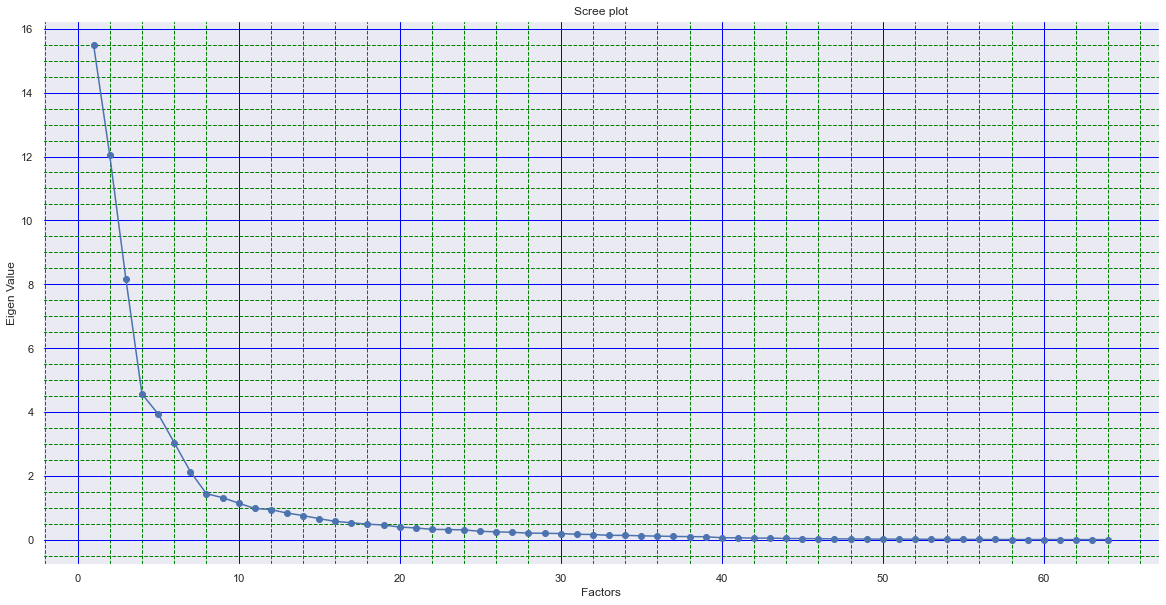

In [54]:
sns.set()
plt.figure(figsize=(20,10))
plt.scatter(xvals,ev)
plt.plot(xvals, ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(color = 'blue', )
plt.grid(visible=True, which='minor', color='green', linestyle='--')
plt.minorticks_on()
plt.show()

In [55]:
# selected 10 factors as the optimum number of factors, since their Eigenvalues is greater than 1.

In [56]:
fa=FactorAnalyzer(rotation='varimax',n_factors=10)
fact = fa.fit(fa_train_data)
loadings=fa.loadings_

In [57]:
Factors = pd.DataFrame(loadings,index=fa_train_data.columns)
Factors

,0,1,2,3,4,5,6,7,8,9
pop,0.120128,0.973605,-0.000183,0.113105,-0.102589,-0.010924,0.035808,0.021067,-0.015870,0.034228
male_pop,0.117765,0.948401,-0.018944,0.091822,-0.104819,-0.032709,0.032793,0.023786,-0.070903,0.022289
female_pop,0.117420,0.959158,0.018591,0.131416,-0.096366,0.013653,0.037945,0.017681,0.040780,0.045076
rent_mean,0.803981,0.071197,0.083852,-0.119779,-0.022351,0.070690,0.104968,0.003840,-0.152613,0.264957
rent_median,0.758641,0.069522,0.078893,-0.128204,-0.035387,0.054991,0.105381,0.000347,-0.154861,0.268750
rent_stdev,0.668924,0.033145,0.081153,0.045692,0.041983,0.047313,0.038305,0.035312,-0.008464,0.047418
rent_sample_weight,-0.313168,0.200895,0.048689,0.787903,-0.117392,-0.098206,-0.042510,0.015689,0.049225,-0.056956
rent_samples,0.024695,0.292222,0.075993,0.919368,-0.143434,-0.082800,0.016737,-0.007209,-0.078774,0.058254
rent_gt_10,-0.029198,0.055869,0.406585,0.044740,0.007173,-0.012542,0.052354,0.011869,-0.034423,0.333288
rent_gt_15,-0.015221,0.043261,0.629354,0.074849,0.008398,-0.062044,0.054809,-0.005076,-0.043489,0.373853


In [58]:
Factor_variance = fa.get_factor_variance()
pd.DataFrame(Factor_variance,index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])

,0,1,2,3,4,5,6,7,8,9
SS Loadings,11.878223,11.630391,5.513000,5.114170,4.525977,3.726219,2.928129,2.384466,1.749791,1.708220
Proportion Var,0.185597,0.181725,0.086141,0.079909,0.070718,0.058222,0.045752,0.037257,0.027340,0.026691
Cumulative Var,0.185597,0.367322,0.453463,0.533372,0.604090,0.662312,0.708064,0.745321,0.772662,0.799353


In [59]:
# 80% of cumulative variance is explained by 10 factors

In [60]:
# Checking the loadings for some of the latent variables

In [61]:
Factors_df = Factors.loc[['hs_degree','hs_degree_male','hs_degree_female','male_age_median','female_age_median',
                          'home_equity_second_mortgage','second_mortgage','second_mortgage_cdf','pct_own','Bad_Debt']]

In [62]:
Factors_df

,0,1,2,3,4,5,6,7,8,9
hs_degree,0.337273,0.022187,-0.169680,-0.017947,0.196445,0.869586,0.066928,0.074474,-0.036591,0.098295
hs_degree_male,0.353735,0.026584,-0.162551,-0.003487,0.178370,0.803239,0.063636,0.081419,-0.029693,0.102550
hs_degree_female,0.306619,0.022584,-0.177738,-0.048029,0.208407,0.803587,0.062022,0.078222,-0.043300,0.084285
male_age_median,0.166864,-0.067206,-0.112777,-0.219886,0.848955,0.138168,-0.036686,0.015361,0.098812,-0.030040
female_age_median,0.111078,-0.074549,-0.065371,-0.194958,0.856746,0.124444,-0.038646,0.021943,0.183796,-0.024574
home_equity_second_mortgage,0.033825,0.030039,0.021921,0.041897,-0.084969,-0.004138,0.907018,0.177851,-0.053237,0.031426
second_mortgage,0.063359,0.024610,0.034108,0.041042,-0.083456,-0.012849,0.975199,0.154149,-0.054168,0.030842
second_mortgage_cdf,-0.097010,-0.120158,0.007563,0.083833,0.018045,-0.126379,-0.704834,-0.225926,-0.073542,-0.114301
pct_own,0.132285,0.201958,-0.171740,-0.706264,0.322314,0.298721,0.004121,0.046770,0.258775,0.000916
Bad_Debt,0.375158,0.033209,0.002165,-0.022260,0.003971,0.139839,0.411083,0.773473,-0.025157,0.084829


In [63]:
def color(val):
    if val >= 0.5 or val <= -0.5:
        color = 'green'
    else:
        color = 'white'
    return 'background-color: %s' % color 

In [64]:
Factors_df.round(2).style.applymap(color)

,0,1,2,3,4,5,6,7,8,9
hs_degree,0.340000,0.020000,-0.170000,-0.020000,0.200000,0.870000,0.070000,0.070000,-0.040000,0.100000
hs_degree_male,0.350000,0.030000,-0.160000,-0.000000,0.180000,0.800000,0.060000,0.080000,-0.030000,0.100000
hs_degree_female,0.310000,0.020000,-0.180000,-0.050000,0.210000,0.800000,0.060000,0.080000,-0.040000,0.080000
male_age_median,0.170000,-0.070000,-0.110000,-0.220000,0.850000,0.140000,-0.040000,0.020000,0.100000,-0.030000
female_age_median,0.110000,-0.070000,-0.070000,-0.190000,0.860000,0.120000,-0.040000,0.020000,0.180000,-0.020000
home_equity_second_mortgage,0.030000,0.030000,0.020000,0.040000,-0.080000,-0.000000,0.910000,0.180000,-0.050000,0.030000
second_mortgage,0.060000,0.020000,0.030000,0.040000,-0.080000,-0.010000,0.980000,0.150000,-0.050000,0.030000
second_mortgage_cdf,-0.100000,-0.120000,0.010000,0.080000,0.020000,-0.130000,-0.700000,-0.230000,-0.070000,-0.110000
pct_own,0.130000,0.200000,-0.170000,-0.710000,0.320000,0.300000,0.000000,0.050000,0.260000,0.000000
Bad_Debt,0.380000,0.030000,0.000000,-0.020000,0.000000,0.140000,0.410000,0.770000,-0.030000,0.080000


In [65]:
# For HS degree, factor 5 explains the maximum variation in these variables
# for Median Age, factor 4 explains the maximum variation in these variables
# for Second mortgage statistics, factor 6 explains the maximum variation in these variables
# for Ownership percentage, factor 3 explains the maximum variation
# for Bad Debt, factor 7 explains the maximum variation

### Modeling - Linear Regression Model

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lm = LinearRegression()

### Pre-processing Test dataset on similar lines as done for training set

In [68]:
test_data = pd.read_csv(r'C:\Sachin new\Simplilearn\Capstone Project\Real Estate Project\test.csv')

In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [70]:
test_data['UID'].duplicated().sum()

32

In [71]:
test_data.drop_duplicates(inplace = True)

In [72]:
test_data.shape

(11677, 80)

In [73]:
test_data.set_index('UID',inplace = True)

In [74]:
test_data.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,313,42.346422,-83.252823,2711280,39555,3417,1479,1938,858.57169,859.0,232.39082,276.07497,424.0,1.00000,0.95696,0.85316,0.85316,0.85316,0.85316,0.76962,0.63544,435,395,48899.52121,38746.0,44392.20902,798.02401,1180.0,53802.87122,45167.0,43756.56479,464.30972,769.0,1139.24548,1109.0,336.47710,262.67011,474.0,488.51323,436.0,192.75147,271.0,189.18182,0.06443,0.06443,0.07651,0.63624,0.14111,0.55087,0.51965,0.91047,0.92010,0.90391,33.37131,27.83333,22.36768,334.30978,1479.0,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,207,44.100724,-70.257832,14778785,2705204,3796,1846,1950,832.68625,750.0,267.22342,183.32299,245.0,1.00000,1.00000,0.86611,0.67364,0.30962,0.30962,0.30962,0.27197,275,239,72335.33234,61008.0,51895.81159,922.82969,1722.0,85642.22095,74759.0,49156.72870,482.99945,1147.0,1533.25988,1438.0,536.61118,373.96188,937.0,661.31296,668.0,201.31365,510.0,279.69697,0.01175,0.01175,0.14375,0.64755,0.52310,0.26442,0.49359,0.94290,0.92832,0.95736,43.88680,46.08333,22.90302,427.10824,1846.0,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,14871,607,41.948556,-76.783808,258903666,863840,3944,2065,1879,816.00639,755.0,416.25699,141.39063,217.0,0.97573,0.93204,0.78641,0.71845,0.63592,0.47573,0.43689,0.32524,245,206,58501.15901,51648.0,45245.27248,893.07759,1461.0,65694.06582,57186.0,44239.31893,619.73962,1084.0,1254.54462,1089.0,596.85204,340.45884,552.0,397.44466,356.0,189.40372,664.0,534.16737,0.01069,0.01316,0.06497,0.45395,0.51066,0.60484,0.83848,0.89238,0.86003,0.92463,39.81661,41.91667,24.29111,499.10080,2065.0,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,42633,606,36.746009,-84.766870,501694825,2623067,2508,1427,1081,418.68937,385.0,156.92024,88.95960,93.0,1.00000,0.93548,0.93548,0.64516,0.55914,0.46237,0.46237,0.36559,153,93,38237.55059,31612.0,34527.61607,775.17947,957.0,44156.38709,34687.0,34899.74300,535.21987,689.0,862.65763,749.0,624.42157,299.56752,337.0,200.88113,180.0,91.56490,467.0,454.85404,0.00995,0.00995,0.01741,0.41915,0.53770,0.80931,0.87403,0.60908,0.56584,0.65947,41.81638,43.00000,24.65325,333.57733,1427.0,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,78410,361,27.882462,-97.678586,13796057,497689,6230,3274,2956,1031.63763,997.0,326.76727,277.39844,624.0,0.72276,0.66506,0.53526,0.38301,0.18910,0.16667,0.14263,0.11058,660,624,114456.07790,94211.0,81950.95692,836.30759,2404.0,123527.02420,103898.0,72173.55823,507.42257,1738.0,1996.41425,1907.0,740.21168,319.97570,1102.0,867.57713,

In [75]:
pd.DataFrame({'Missing Count': test_data.isna().sum(), 'Missing Percent': (test_data.isna().mean().round(4)*100)})

,Missing Count,Missing Percent
BLOCKID,11677,100.00
SUMLEVEL,0,0.00
COUNTYID,0,0.00
STATEID,0,0.00
state,0,0.00
state_ab,0,0.00
city,0,0.00
place,0,0.00
type,0,0.00
primary,0,0.00


In [76]:
test_data.drop(test_data[['BLOCKID','primary','SUMLEVEL']], axis = 1, inplace=True)

In [77]:
(test_data['pop']==0).value_counts()

False    11603
True        74
Name: pop, dtype: int64

In [78]:
test_data = test_data.drop(test_data[test_data['pop']==0].index)

In [79]:
test_data[test_data['hi_mean'].isna()]

,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
281635,37,47,Tennessee,TN,Nashville,Nashville-davidson Metropolitan Government,City,37209,615,36.179041,-86.883456,14833107,1085155,1332,1257,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64225,0.62918,0.87143,43.20423,41.50000,12.16400,269.23539,1257.0,39.33872,39.66667,5.75119,14.62228,75.0,NaN,0.28242,0.28242,0.05012,0.29276
253631,65,26,Michigan,MI,East Lansing,East Lansing City,CDP,48823,517,42.724476,-84.464366,197880,0,3368,1759,1609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.03895,18.91667,1.27419,939.97391,1759.0,18.94500,18.83333,1.14042,847.97640,1609.0,NaN,0.00000,0.00000,0.00000,0.00000
266664,27,36,New York,NY,Poughquag,Hopewell Junction,City,12570,845,41.578838,-73.722796,3206552,62329,1843,1843,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70051,0.70051,NaN,43.06144,43.50000,10.84415,379.82442,1843.0,NaN,NaN,NaN,NaN,NaN,NaN,0.30982,0.30982,0.04883,0.19045
270827,119,36,New York,NY,Ossining,Ossining,City,10562,914,41.151312,-73.868465,268098,0,1775,1771,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33983,0.33831,1.00000,40.62796,40.91667,8.40702,341.63034,1771.0,46.91465,46.58333,12.12029,1.03758,4.0,NaN,0.23828,0.23828,0.06889,0.09430
280975,79,45,South Carolina,SC,Columbia,St. Andrews,City,29210,803,34.069566,-81.098423,8774836,666286,5537,4772,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60521,0.61350,0.55700,37.84302,36.41667,12.38590,1099.30696,4772.0,38.33388,35.08333,12.99553,169.48620,765.0,NaN,0.18450,0.18450,0.04729,0.15305
224969,29,6,California,CA,Delano,Delano City,City,93215,661,35.783063,-119.312322,2538080,0,4210,4210,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53122,0.53122,NaN,34.09942,31.83333,11.27436,1198.19758,4210.0,NaN,NaN,NaN,NaN,NaN,NaN,0.23420,0.23420,0.04774,0.11663
282677,157,47,Tennessee,TN,Memphis,Memphis City,City,38107,901,35.053396,-89.971244,19126957,0,64,40,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60938,0.67500,0.50000,53.83333,43.75000,16.49448,7.45763,40.0,43.73806,35.16667,12.35329,4.47458,24.0,NaN,0.32500,0.32500,0.32500,0.35000
226811,37,6,California,CA,Downey,Paramount City,City,90242,562,33.

In [80]:
test_data = test_data.drop(test_data[test_data['hi_mean'].isna()].index)

In [81]:
test_data[rent_na] = test_data.groupby('state')[rent_na].transform(lambda x: x.fillna(x.mean()))
test_data[family_na] = test_data.groupby('state')[family_na].transform(lambda x: x.fillna(x.mean()))
test_data[hc_mortgage_na] = test_data.groupby('state')[hc_mortgage_na].transform(lambda x: x.fillna(x.mean()))
test_data[hc_na] = test_data.groupby('state')[hc_na].transform(lambda x: x.fillna(x.mean()))

In [82]:
test_data.fillna(test_data.mean(numeric_only = True), inplace = True)

In [83]:
pd.DataFrame({'Missing Count': test_data.isna().sum(), 'Missing Percent': (test_data.isna().mean().round(4)*100)})

,Missing Count,Missing Percent
COUNTYID,0,0.0
STATEID,0,0.0
state,0,0.0
state_ab,0,0.0
city,0,0.0
place,0,0.0
type,0,0.0
zip_code,0,0.0
area_code,0,0.0
lat,0,0.0


In [84]:
test_data['Bad_Debt'] = test_data['second_mortgage'] + test_data['home_equity'] - test_data['home_equity_second_mortgage']

In [85]:
lr_train_data = train_data.drop(category_columns, axis=1)
lr_train_data = lr_train_data.drop(unwanted_columns, axis=1)

In [86]:
lr_train_data.head()

,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,Bad_Debt
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267822,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408
246444,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274
245683,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512
279653,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086
247218,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.74967,1.00000,1.00000,1.00000,26.07533,22.41667,11.84399,1296.89877,2586.0,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426


In [87]:
lr_test_data = test_data.drop(category_columns, axis=1)
lr_test_data = lr_test_data.drop(unwanted_columns, axis=1)

In [88]:
lr_test_data.head()

,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,Bad_Debt
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255504,3417,1479,1938,858.57169,859.0,232.39082,276.07497,424.0,1.00000,0.95696,0.85316,0.85316,0.85316,0.85316,0.76962,0.63544,435,395,48899.52121,38746.0,44392.20902,798.02401,1180.0,53802.87122,45167.0,43756.56479,464.30972,769.0,1139.24548,1109.0,336.47710,262.67011,474.0,488.51323,436.0,192.75147,271.0,189.18182,0.06443,0.06443,0.07651,0.63624,0.14111,0.55087,0.51965,0.91047,0.92010,0.90391,33.37131,27.83333,22.36768,334.30978,1479.0,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299,0.07651
252676,3796,1846,1950,832.68625,750.0,267.22342,183.32299,245.0,1.00000,1.00000,0.86611,0.67364,0.30962,0.30962,0.30962,0.27197,275,239,72335.33234,61008.0,51895.81159,922.82969,1722.0,85642.22095,74759.0,49156.72870,482.99945,1147.0,1533.25988,1438.0,536.61118,373.96188,937.0,661.31296,668.0,201.31365,510.0,279.69697,0.01175,0.01175,0.14375,0.64755,0.52310,0.26442,0.49359,0.94290,0.92832,0.95736,43.88680,46.08333,22.90302,427.10824,1846.0,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377,0.14375
276314,3944,2065,1879,816.00639,755.0,416.25699,141.39063,217.0,0.97573,0.93204,0.78641,0.71845,0.63592,0.47573,0.43689,0.32524,245,206,58501.15901,51648.0,45245.27248,893.07759,1461.0,65694.06582,57186.0,44239.31893,619.73962,1084.0,1254.54462,1089.0,596.85204,340.45884,552.0,397.44466,356.0,189.40372,664.0,534.16737,0.01069,0.01316,0.06497,0.45395,0.51066,0.60484,0.83848,0.89238,0.86003,0.92463,39.81661,41.91667,24.29111,499.10080,2065.0,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026,0.06744
248614,2508,1427,1081,418.68937,385.0,156.92024,88.95960,93.0,1.00000,0.93548,0.93548,0.64516,0.55914,0.46237,0.46237,0.36559,153,93,38237.55059,31612.0,34527.61607,775.17947,957.0,44156.38709,34687.0,34899.74300,535.21987,689.0,862.65763,749.0,624.42157,299.56752,337.0,200.88113,180.0,91.56490,467.0,454.85404,0.00995,0.00995,0.01741,0.41915,0.53770,0.80931,0.87403,0.60908,0.56584,0.65947,41.81638,43.00000,24.65325,333.57733,1427.0,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489,0.01741
286865,6230,3274,2956,1031.63763,997.0,326.76727,277.39844,624.0,0.72276,0.66506,0.53526,0.38301,0.18910,0.16667,0.14263,0.11058,660,624,114456.07790,94211.0,81950.95692,836.30759,2404.0,123527.02420,103898.0,72173.55823,507.42257,1738.0,1996.41425,1907.0,740.21168,319.97570,1102.0,867.57713,804.0,376.20236,642.0,333.91919,0.00000,0.00000,0.03440,0.63188,1.00000,0.74519,0.52943,0.86297,0.87969,0.84466,42.13301,43.75000,22.69502,833.57435,3274.0,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379,0.03440


In [89]:
x_train = lr_train_data.drop(['hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples'], axis = 1)

y_train = lr_train_data['hc_mortgage_mean']

In [90]:
x_train.head()

,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,Bad_Debt
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267822,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408
246444,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274
245683,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512
279653,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086
247218,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.74967,1.00000,1.00000,1.00000,26.07533,22.41667,11.84399,1296.89877,2586.0,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426


In [91]:
y_train.head()

UID
267822    1414.80295
246444     864.41390
245683    1506.06758
279653    1175.28642
247218    1192.58759
Name: hc_mortgage_mean, dtype: float64

In [92]:
x_test = lr_test_data.drop(['hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples'], axis = 1)
y_test = lr_test_data['hc_mortgage_mean']
x_test

,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,Bad_Debt
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255504,3417,1479,1938,858.57169,859.0,232.39082,276.07497,424.0,1.00000,0.95696,0.85316,0.85316,0.85316,0.85316,0.76962,0.63544,435,395,48899.52121,38746.0,44392.20902,798.02401,1180.0,53802.87122,45167.0,43756.56479,464.30972,769.0,488.51323,436.0,192.75147,271.0,189.18182,0.06443,0.06443,0.07651,0.63624,0.14111,0.55087,0.51965,0.91047,0.92010,0.90391,33.37131,27.83333,22.36768,334.30978,1479.0,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299,0.07651
252676,3796,1846,1950,832.68625,750.0,267.22342,183.32299,245.0,1.00000,1.00000,0.86611,0.67364,0.30962,0.30962,0.30962,0.27197,275,239,72335.33234,61008.0,51895.81159,922.82969,1722.0,85642.22095,74759.0,49156.72870,482.99945,1147.0,661.31296,668.0,201.31365,510.0,279.69697,0.01175,0.01175,0.14375,0.64755,0.52310,0.26442,0.49359,0.94290,0.92832,0.95736,43.88680,46.08333,22.90302,427.10824,1846.0,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377,0.14375
276314,3944,2065,1879,816.00639,755.0,416.25699,141.39063,217.0,0.97573,0.93204,0.78641,0.71845,0.63592,0.47573,0.43689,0.32524,245,206,58501.15901,51648.0,45245.27248,893.07759,1461.0,65694.06582,57186.0,44239.31893,619.73962,1084.0,397.44466,356.0,189.40372,664.0,534.16737,0.01069,0.01316,0.06497,0.45395,0.51066,0.60484,0.83848,0.89238,0.86003,0.92463,39.81661,41.91667,24.29111,499.10080,2065.0,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026,0.06744
248614,2508,1427,1081,418.68937,385.0,156.92024,88.95960,93.0,1.00000,0.93548,0.93548,0.64516,0.55914,0.46237,0.46237,0.36559,153,93,38237.55059,31612.0,34527.61607,775.17947,957.0,44156.38709,34687.0,34899.74300,535.21987,689.0,200.88113,180.0,91.56490,467.0,454.85404,0.00995,0.00995,0.01741,0.41915,0.53770,0.80931,0.87403,0.60908,0.56584,0.65947,41.81638,43.00000,24.65325,333.57733,1427.0,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489,0.01741
286865,6230,3274,2956,1031.63763,997.0,326.76727,277.39844,624.0,0.72276,0.66506,0.53526,0.38301,0.18910,0.16667,0.14263,0.11058,660,624,114456.07790,94211.0,81950.95692,836.30759,2404.0,123527.02420,103898.0,72173.55823,507.42257,1738.0,867.57713,804.0,376.20236,642.0,333.91919,0.00000,0.00000,0.03440,0.63188,1.00000,0.74519,0.52943,0.86297,0.87969,0.84466,42.13301,43.75000,22.69502,833.57435,3274.0,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379,0.03440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238088,5611,2697,2914,1458.82449,1603.0,566.90682,29.43733,99.0,1.00000,1.00000,1.00000,0.62626,0.62626,0.35354,0.18182,0.09091,147,99,57723.48180,48192.0,41301.62188,1636.68434,2496.0,70786.81912,59194.0,40582.36046,945.85894,1685.0,536.66053,500.0,267.25752,1325.0,914.89899,0.02043,0.03619,0.04044,0.43593,0.29592,0.71860,0.85762,0.92097,0.95007,0.89480,51.03535,55.50000,22.41099,704.65208,2697.0,53.51255,59.58333,23.23426,699.33353,2914.0,0.93121,0.65969,0.

In [93]:
print(x_train.shape, x_test.shape)

(26954, 59) (11565, 59)


In [94]:
lm.fit(x_train,y_train)

LinearRegression()

In [95]:
lm.coef_

array([ 1.93145965e-02,  1.57520885e-01, -1.38206282e-01,  8.35491761e-02,
        7.51755934e-02,  2.52661104e-01, -2.35746122e-01,  2.56615683e-01,
        1.04627026e+02,  3.04194129e+01,  3.79790344e+01,  6.53512696e+01,
        6.31203875e+01,  2.96127401e+00, -3.70453298e+01, -4.31675913e+00,
        4.58190445e-01, -3.80185357e-01,  1.82731346e-03,  1.67166036e-03,
        7.41970460e-03,  7.72565206e-02, -3.51564249e-01,  1.34569556e-03,
        7.10154204e-04,  1.32554826e-03, -1.95520413e-01,  2.99689810e-01,
        6.72412182e-01,  1.81019757e-01,  2.92452146e-01, -1.39275809e-01,
        3.89538206e-01, -5.77605384e+02,  6.06164648e+02, -2.93445203e+02,
       -2.62280845e+02,  1.66529106e+01, -7.47913372e+01, -2.53567046e+02,
        3.01008436e+02, -2.83502542e+02, -5.56396536e+02,  3.32638478e+00,
        4.33336715e+00,  3.93130633e+00, -5.69546830e-02, -1.45108728e-01,
       -5.72902420e-01,  2.94008122e+00, -2.32344154e+00,  1.12055532e-01,
        1.13444076e-01, -

In [96]:
coeff_df = pd.DataFrame(lm.coef_ , index = x_train.columns , columns = ['Coefficient'])
coeff_df.round(4)

,Coefficient
pop,0.0193
male_pop,0.1575
female_pop,-0.1382
rent_mean,0.0835
rent_median,0.0752
rent_stdev,0.2527
rent_sample_weight,-0.2357
rent_samples,0.2566
rent_gt_10,104.6270
rent_gt_15,30.4194


In [97]:
lm.intercept_

505.61964283750603

In [98]:
predictions = lm.predict(x_test)

In [99]:
predictions

array([1174.68133217, 1500.60054286, 1209.86188323, ..., 1793.37061446,
       1172.35887029, 1479.35390991])

In [100]:
pred_data = pd.DataFrame({'Original' : y_test , 'Prediction by Model' : predictions})
pred_data.round(2)

,Original,Prediction by Model
UID,,
255504,1139.25,1174.68
252676,1533.26,1500.60
276314,1254.54,1209.86
248614,862.66,798.96
286865,1996.41,2166.90
...,...,...
238088,1269.83,1443.96
242811,1406.83,1336.48
250127,1791.64,1793.37


In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , mean_absolute_percentage_error , r2_score

In [102]:
mae = mean_absolute_error(y_test, predictions).round(4)
mse = mean_squared_error(y_test, predictions).round(4)
rmse = np.sqrt(mean_squared_error(y_test, predictions)).round(4)
mape = mean_absolute_percentage_error(y_test, predictions).round(4)
r2 = r2_score(y_test, predictions).round(4)

In [103]:
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('R2:', r2)

Mean Absolute Error (MAE): 174.9382
Mean Squared Error (MSE): 61938.9373
Root Mean Squared Error (RMSE): 248.8753
Mean Absolute Percentage Error (MAPE): 0.1117
R2: 0.8452


In [104]:
n = x_train.shape[0]
p = x_train.shape[1]

In [105]:
adj_r2 = 1 - (1 - r2_score(y_test, predictions)) * (n - 1) / (n - p - 1)
adj_r2.round(4)

0.8449

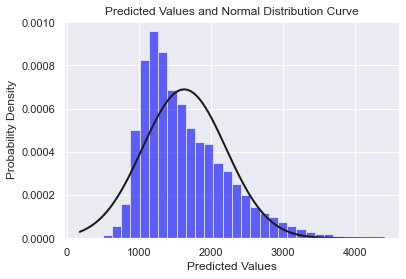

In [106]:
plt.hist(predictions, bins=30, density=True, alpha=0.6, color='blue')
x_min, x_max = plt.xlim()
x = np.linspace(x_min, x_max, 100)
p = norm.pdf(x, np.mean(predictions), np.std(predictions))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Probability Density')
plt.title('Predicted Values and Normal Distribution Curve')
plt.show()

#### The predicted values are positively skewed. They do not appear to be normally distributed. However, to check whether they are normally distributed using a statistical measure, Shapiro-Wilk test and Anderson-Darling tests are performed.

### Shapiro-Wilk test

In [107]:
from scipy.stats import shapiro

# perform the Shapiro-Wilk test
stat, pvalue = shapiro(predictions)
print("Statistic:", stat, "Pvalue:", pvalue)
# interpret the test results
alpha = 0.05

if pvalue > alpha:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')


Statistic: 0.9321021437644958 Pvalue: 0.0
The data is not normally distributed


C:\Users\14sac\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Anderson-Darling test

In [108]:
from scipy.stats import anderson

In [109]:
anderson(predictions)

AndersonResult(statistic=226.12719720747555, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### The critical value for α = 0.025 is 0.858. Because the test statistic i.e. 226.127 is greater than all the critical values (for different levels of significance), the results are significant at all significance levels. Hence, the null hypothesis can be rejected. i.e. there is sufficient evidence to say that the data is not normally distributed.